In [41]:
import pickle
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [42]:
with open('../dados/depresso.pkl', 'rb') as f:
  X_train, X_test, y_train, y_test = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/dados/depresso.pkl'

In [27]:
modelo = xgb.XGBClassifier()

In [28]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [29]:
random_search = RandomizedSearchCV(
    estimator= modelo, 
    param_distributions=param_grid, 
    n_iter=100,  # Número de combinações aleatórias a testar
    scoring='accuracy',  # Métrica de avaliação
    cv=3,  # Validação cruzada com 3 folds
    verbose=1,  # Mostrar progresso
    random_state=42,  # Para reprodutibilidade
    n_jobs=-1  # Usar todos os núcleos disponíveis para acelerar
)

In [30]:
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.8],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 6, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [31]:
melhor_modelo = random_search.best_estimator_

In [32]:
previsoes = melhor_modelo.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.948306595365419

In [34]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[   3,   57],
       [   1, 1061]])

0.9393939393939394

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

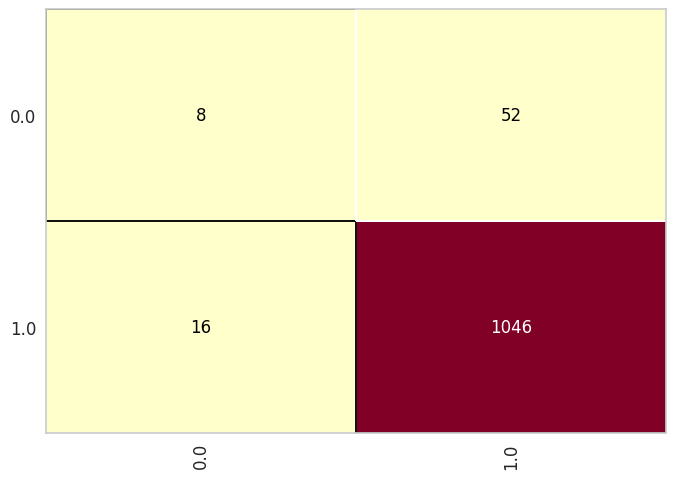

In [35]:
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [36]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         0.0       0.75      0.05      0.09        60
         1.0       0.95      1.00      0.97      1062

    accuracy                           0.95      1122
   macro avg       0.85      0.52      0.53      1122
weighted avg       0.94      0.95      0.93      1122

